# Histogram
反映圖片亮度、色彩、強度 在照片裡分布的情況

#### 1.用matplotlib畫直方圖 (整張照片 看強度)

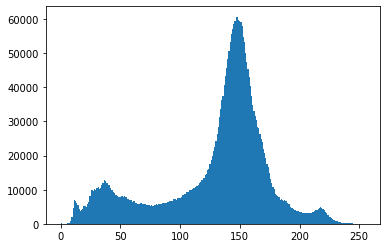

In [2]:
import cv2
import matplotlib.pyplot as plt

o=cv2.imread("./images/boat.jpg")
cv2.imshow("original",o)

#plt.hist() matplotlib畫直方圖語法
plt.hist(o.ravel(),256) # .ravel() 把照片攤平為一維度 分256份
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

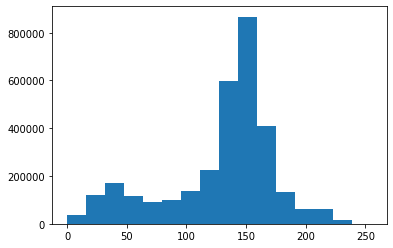

In [3]:
import cv2
import matplotlib.pyplot as plt

o=cv2.imread("./images/boat.jpg")

# 分成16個bins
plt.hist(o.ravel(),16)
plt.show()

#### 2.用openCV畫直方圖 (照片分層 看強度)

In [8]:
import cv2

img=cv2.imread("./images/lena.bmp")
print(img.shape) # 有BGR三層 看你要看哪一層
                
hist = cv2.calcHist([img],[0],None,[256],[0,255])  #(照片,深度:第幾層,mask,分幾份,區間)

print(type(hist))
print(hist.shape)
print(hist.size)
print(hist) #像素


(512, 512, 3)
<class 'numpy.ndarray'>
(256, 1)
256
[[0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [4.7400e+02]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [4.4770e+03]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.3395e+04]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.5131e+04]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [9.4610e+03]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+0

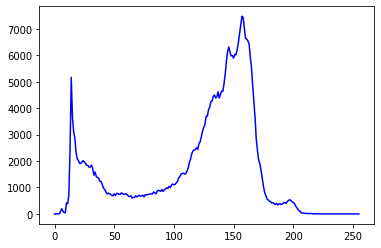

In [12]:
import cv2
import matplotlib.pyplot as plt

o=cv2.imread("./images/boatGray.bmp")

histb = cv2.calcHist([o],[0],None,[256],[0,255]) #(照片,深度:第幾層,mask,分幾份,區間)

plt.plot(histb,color='b') #畫線
plt.show()

#### 一次看BGR三層 強度分布

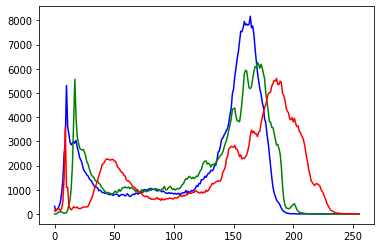

In [9]:
import cv2
import matplotlib.pyplot as plt
o=cv2.imread("./images/girl.bmp")

histb = cv2.calcHist([o],[0],None,[256],[0,255])  #(照片,深度:第幾層,mask,分幾份,區間)
histg = cv2.calcHist([o],[1],None,[256],[0,255])
histr = cv2.calcHist([o],[2],None,[256],[0,255])

plt.plot(histb,color='b')
plt.plot(histg,color='g')
plt.plot(histr,color='r')
plt.show()

#### 使用遮罩

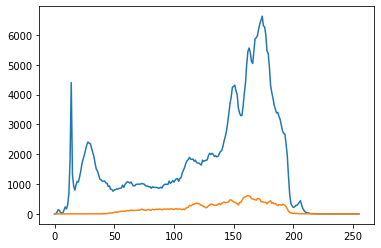

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread("./images/girl.bmp",cv2.IMREAD_GRAYSCALE) #灰階 只有一層

mask=np.zeros(image.shape,np.uint8) #設一個跟圖片一樣大的矩陣 內容填0
mask[200:400,200:400]=255  #mask[x,y] 通常只會寫255或0(表示八個1或八個0)

histImage=cv2.calcHist([image],[0],None,[256],[0,255]) #(照片,深度:第幾層,mask,分幾份,區間)
histMI=cv2.calcHist([image],[0],mask,[256],[0,255])

plt.plot(histImage) #藍
plt.plot(histMI) #橘
plt.show()

cv2.imshow('image',image)
cv2.imshow('mask',mask)

cv2.waitKey()
cv2.destroyAllWindows()

# Histogram equalization 直方圖均衡化
`讓照片"對比度" 變明顯`

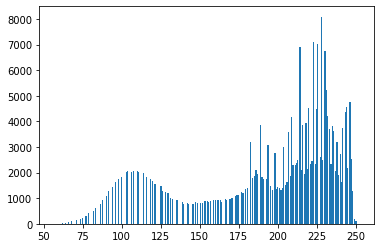

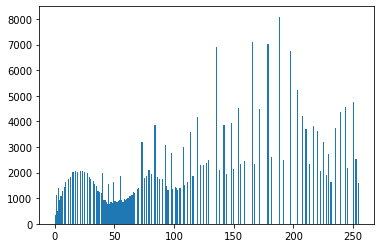

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/equ.bmp',cv2.IMREAD_GRAYSCALE)

equ = cv2.equalizeHist(img) #直方圖均衡化

#------比較均衡化前後的直方圖------

plt.figure()  #建獨立一張圖
plt.hist(img.ravel(),256)  # .ravel() 把照片攤平為一維度 且256等分

plt.figure()  
plt.hist(equ.ravel(),256)

#-----比較均衡化前後的照片-----

cv2.imshow("original",img)
cv2.imshow("result",equ)

cv2.waitKey()
cv2.destroyAllWindows()